In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [4]:
# Removing the first two columns of the DataFrame and keeping the rest
df = df.iloc[:, 2:]

# Displaying the first few rows of the modified DataFrame
df.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# New Section

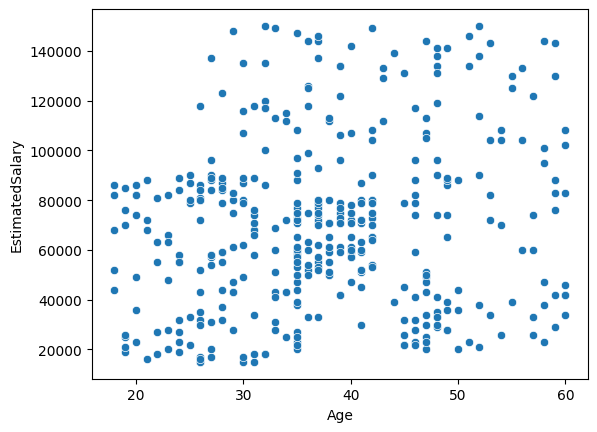

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is a pandas DataFrame with at least two columns
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1])

# Display the plot
plt.show()



### Explanation:
- **`x=df.iloc[:, 0]`**: The first column is plotted on the x-axis.
- **`y=df.iloc[:, 1]`**: The second column is plotted on the y-axis.
- **`plt.show()`**: Displays the plot.



In [7]:
# Selecting the first two columns of the dataframe (df) and assigning them to the variable X
X = df.iloc[:, 0:2]

# Selecting the last column of the dataframe (df) and assigning it to the variable y
y = df.iloc[:, -1]


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.3347 - loss: 3045.3008 - val_accuracy: 0.6000 - val_loss: 428.6501
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6733 - loss: 626.9114 - val_accuracy: 0.6000 - val_loss: 364.1581
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5253 - loss: 219.0560 - val_accuracy: 0.6000 - val_loss: 200.2110
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5864 - loss: 187.3662 - val_accuracy: 0.4000 - val_loss: 29.6936
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5466 - loss: 89.6057 - val_accuracy: 0.4000 - val_loss: 15.9852
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4909 - loss: 89.5530 - val_accuracy: 0.4000 - val_loss: 111.1190
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4753 - loss: 99.5238 - val_accuracy: 0.4000 - val_loss: 73.9696
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4993 - loss: 67.3900 

## The accuracy is jumping between 35 to 60

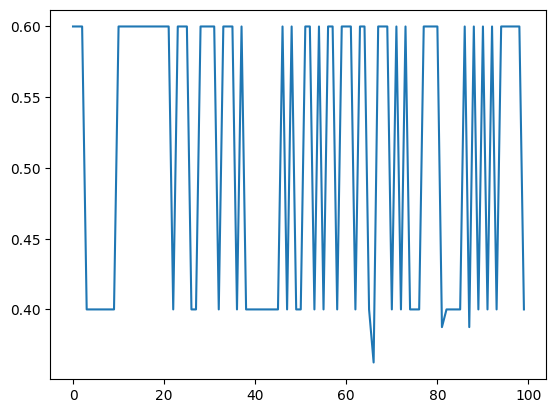

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

# Applying scaling

In [22]:
# Importing the StandardScaler class from sklearn.preprocessing to standardize the features
from sklearn.preprocessing import StandardScaler

# Creating an instance of the StandardScaler class
scaler = StandardScaler()

# Fitting the scaler to the training data (X_train) and transforming it to standardize the features
X_train_scaled = scaler.fit_transform(X_train)

# Using the previously fitted scaler to transform the test data (X_test) without fitting it again
X_test_scaled = scaler.transform(X_test)


In [23]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

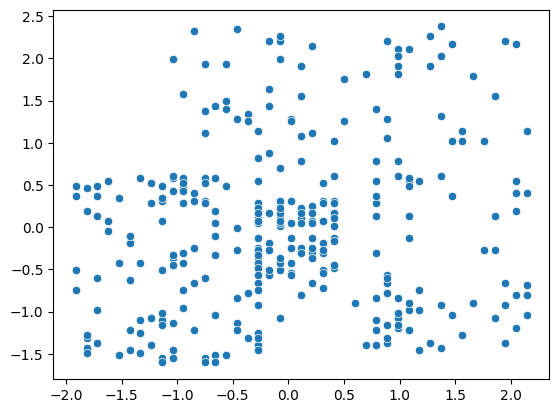

In [25]:
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1])

In [26]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.4475 - loss: 0.6549 - val_accuracy: 0.8250 - val_loss: 0.5994
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7982 - loss: 0.6100 - val_accuracy: 0.8875 - val_loss: 0.5517
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8553 - loss: 0.5647 - val_accuracy: 0.8750 - val_loss: 0.5112
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8740 - loss: 0.5244 - val_accuracy: 0.8625 - val_loss: 0.4760
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8984 - loss: 0.4906 - val_accuracy: 0.8375 - val_loss: 0.4458
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8748 - loss: 0.4679 - val_accuracy: 0.8250 - val_loss: 0.4206
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9031 - loss: 0.4142 - val_accuracy: 0.8375 - val_loss: 0.3974
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8790 - loss: 0.3926 - val_accuracy: 0.8500 - val_lo

# After Scaling the accuracy is Greatly Improved !!

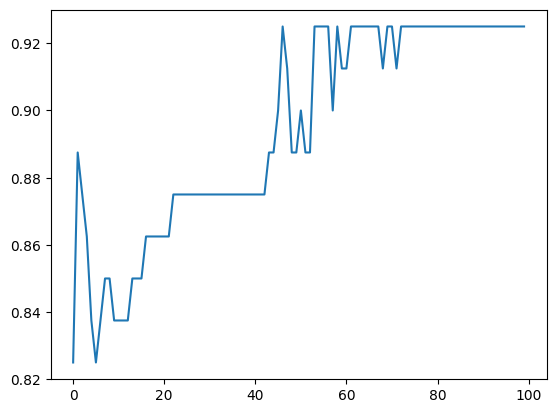

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])